# Assignment Brief: Convolutional Neural Networks in PyTorch  

## Deadline: 15 December 2023, 17:00 GMT

## Number of marks available: 10

In this practical, we will build a convolutional neural network to classify handwritten digits. More specifically, we will use the MNIST dataset to implement and evaluate a neural network-based model for classification of handwritten digits. The main aim is for you to learn, enjoy, and hopefully benefit from it.

You should implement and test your solution in PyTorch.

### Please READ the whole assignment first, before starting to work on it.

### How and what to submit

A. A **Jupyter Notebook** with the code in all the cells executed and outputs displayed.

B. Name your Notebook **COMP61011_AssignmentB2_XXXXXX.ipynb** where XXXXXX is your username such as such as abc18de. Example: `COMP61011_AssignmentB2_abc18de.ipynb`

C. Upload the Jupyter Notebook in B to Blackboard under the **Group B: Computing Assignment (PyTorch)** submission area before the deadline. **There are two submissions: please pay close attention to submit to the right place!**

D. **NO DATA UPLOAD**: Please do not upload the data files used in this Notebook. We have a copy already.


### Assessment Criteria

* Being able to use PyTorch to build, train, and evaluate a Convolutional Neural Network for supervised learning.

* Understanding the architecture of a Convolutional Neural Network, and gaining practical experience in designing and training such a network.

* Understanding concepts such as convolution, pooling, and padding, and how they are used in a Convolutional Neural Network. Understanding loss and activation functions.

* Being able to monitor and report the performance of a neural network on a given dataset with respect to accuracy and the chosen loss function.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 10% of the mark each 24 hours the work is late after the deadline. NO late submission will be marked one week after the deadline. Please read [this link](https://wiki.cs.manchester.ac.uk/index.php/UGHandbook23:Main#Late_Submission_of_Coursework_Penalty).

### Use of unfair means

**Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations.** Please carefully read [what constitutes Unfair Means](https://documents.manchester.ac.uk/display.aspx?DocID=2870) if not sure. If you still have questions, please ask your Personal tutor or the Lecturers.

## Background

Read about convolution and [how 2-D convolution](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and  [Max-pooling](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) are implemented in PyTorch.

It would help you review the lecture notes to understand how the size of the next layer is computed; you may need to specify these as parameters, rather than them being inferred based on the model specification. Also be sure to understand the difference between `valid` and `same` padding. It'll help to understand how the sizes are affected by strides, padding, etc., in order to implement the network properly.

For further reading on CNNs, you may wish to visit the [CS132n course site](https://cs231n.github.io/convolutional-networks/). For a much more in-depth guide to convolution arithmetic, see [this 2016 paper](https://arxiv.org/pdf/1603.07285v1.pdf).

## Loading the MNIST dataset
For your convenience, the required python modules for this assignment have been provided in `requirements.txt`. You can run the following terminal command to install them: `python -m pip install -r requirements.txt`

A copy of the MNIST dataset is included in PyTorch. We will download it, then load it into memory using the `torchvision` module.

In [3]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

# The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard
# deviation of the MNIST dataset. This is equivalent to scaling all pixel values between [0, 1].
transform = torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
            ])

train_data = torchvision.datasets.MNIST('', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST('', train=False, download=True, transform=transform)

# We can see some information about this data, including the transform we've applied.
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

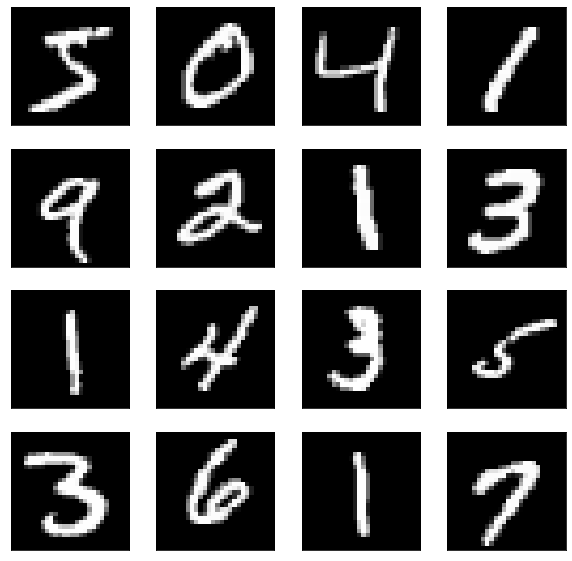

In [4]:
# Visualize the first 16 elements of the training set
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(train_data.data[i], cmap='gray')

## Convolutional Neural Network (3 marks)

Write a CNN class which defines your model. We will base our CNN on the LeNet-5 architecture, which is a classic CNN architecture for image classification. You can read more about it [here](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf).

Below is the CNN configuration, which achieves above 98% accuracy in the training, validation and testing. If you deviate from the below configuration, you **must** include comments explaining your changes. Failure to do so will mean you will lose marks on this section.

- The inputs to the first layer should be 28x28x1 images (1 because these are grey scale), and this is the expected input of the model.
- Add a convolutional layer with 28 filters of size 5x5x1 (and the ReLU non-linearity). Use a stride of 1 in both directions, and add padding as necessary.
- PyTorch automatically initialises weights in most cases, but to demonstrate how it's done it here, we'll initialise weights as Gaussian random variables with mean 0 and variance 0.0025. For biases we'll initialise everything with a constant 0.1. This is because we're mainly going to be using ReLU non-linearities. **Please ensure that you demonstrate how to manually initialise weights and biases, this will be marked.**
- Add a max_pooling layer with pool size 2x2 and 2 stride.
- Add a second convolutional layer with 16 filters of size 5x5x28. Again, use a stride of 1 in both directions, and use the ReLU non-linearity. Ensure there is no padding. Initialise the weights and biases as in the first convolution layer.
- Add a max_pooling layer with pool size 2x2 and 2 stride.
- Add a Flatten-type layer: https://pytorch.org/docs/stable/generated/torch.flatten.html.
- Add a fully connected (dense) layer with 1024 units. Each unit in the max_pool should be connected to these 1024 units. Add the ReLU non-linearity to these units.
- Add another dense layer with 128 units, and add the ReLU non-linearity.
- Add a Dropout layer to reduce overfitting, with a 0.2 rate.
- Add a final fully connected layer to get 10 output units, and a `log_softmax` activation function.

Finally, use the [pytorch-summary](https://github.com/sksq96/pytorch-summary) package to check the configuration of your CNN model.

In [12]:
# Define the model
class CNN(torch.nn.Module):
    # Your code here
    def __init__(self):
        super(CNN, self).__init__()

        #Convolutional Layer 1
        #output size = 1 + (input size - kernel size + 2*padding)/stride
        #28 = 1 + (28 - 5 + 2*padding)/1 => padding = 2
        self.conv1 = torch.nn.Conv2d(1, 28, kernel_size=(5,5), stride=1, padding=2)           

        #Weight initialisation with mean 0 and variance 0.0025. 
        variance = 0.0025
        std_dev = torch.sqrt(torch.tensor(variance))                     #Standard deviation is the square root of variance.
        torch.nn.init.normal_(self.conv1.weight, mean=0, std=std_dev)
        torch.nn.init.constant_(self.conv1.bias, 0.1)

        #Max Pooling Layer 1
        self.pool1 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)

        #Convolutional Layer 2
        self.conv2 = torch.nn.Conv2d(28, 16, kernel_size=(5,5), stride=1, padding=0)
        
        #Weight initialisation as in the Convolutional Layer 1. 
        torch.nn.init.normal_(self.conv2.weight, mean=0, std=std_dev)
        torch.nn.init.constant_(self.conv2.bias, 0.1)

        #Max Pooling Layer 2
        self.pool2 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)

        #Flatten Layer
        self.flatten = torch.nn.Flatten()

        #Fully Connected Layer 1
        self.fc1 = torch.nn.Linear(16 * 5 * 5, 1024)

        #Fully Connected Layer 2
        self.fc2 = torch.nn.Linear(1024, 128)

        #Dropout Layer
        self.dropout = torch.nn.Dropout(0.2)

        #Final Fully Connected Layer
        self.fc3 = torch.nn.Linear(128, 10)

        #Log Softmax Activation
        self.log_softmax = torch.nn.LogSoftmax(dim=1)
 
        #ReLU Activation Function
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        # Forward Pass through the layers
        x = self.relu(self.conv1(x))                       # Apply the first convolutional layer followed by the ReLU activation
        x = self.pool1(x)                                  # Apply the first max-pooling layer
        x = self.relu(self.conv2(x))                       # Apply the second convolutional layer followed by the ReLU activation
        x = self.pool2(x)                                  # Apply the second max-pooling layer
        x = self.flatten(x)                                # Flatten the output before passing it through the first fully connected layer
        x = self.relu(self.fc1(x))                         # Apply the first fully connected layer followed by the ReLU activation
        x = self.relu(self.fc2(x))                         # Apply the second fully connected layer followed by the ReLU activation
        x = self.dropout(x)                                # Apply dropout to prevent overfitting
        x = self.fc3(x)                                    # Apply the final fully connected layer without activation
        output = self.log_softmax(x)                       # Apply the log softmax activation for output probabilities
        return output


In [13]:
# your code here
#Create an instance of the CNN model
model = CNN()

#Display a summary of the model architecture
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 28, 28]             728
              ReLU-2           [-1, 28, 28, 28]               0
         MaxPool2d-3           [-1, 28, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]          11,216
              ReLU-5           [-1, 16, 10, 10]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                 [-1, 1024]         410,624
              ReLU-9                 [-1, 1024]               0
           Linear-10                  [-1, 128]         131,200
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
       LogSoftmax-14                   

## Loss function, accuracy and train/test algorithm (3 marks)

- We'll use the cross-entropy loss function, also called the negative log likelihood loss in PyTorch.
- Accuracy is simply defined as the fraction of data correctly classified.
- For training, use the [SGD optimiser](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (read the documentation) and set the learning rate to be 1e-2 and momentum to be 0.9.
- Further split the training set into train and validation sets (use 10% for validation) and record the training and validation accuracy for each training epoch; however, do not touch the test dataset.
- You may find it useful to print the accuracy or loss every 100 batches or so, to see how the training is progressing. This is not required.

In [14]:
# PyTorch requires that we specify a device. This is the CPU or GPU that PyTorch will use to run the model.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Your code here
from torch.utils.data import DataLoader, random_split
model.to(device)                                         #Assign the model to a device

loss_func = torch.nn.CrossEntropyLoss()                                 #Define the CrossEntropyLoss as the loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)  #Define Stochastic Gradient Descent (SGD) as the optimizer

# Split the dataset into train and validation sets
total_observations = len(train_data)
train_percent = total_observations*0.9
val_percent = total_observations*0.1

#Training set: 90% of the total observations
#Validation set: 10% of the total observations
train_set, val_set = random_split(train_data, [int(train_percent), int(val_percent)])

#DataLoader for train_set with a batch size of 32 and shuffling
train_set_load = DataLoader(train_set, batch_size=32, shuffle=True)

#DataLoader for val_set with a batch size of 32 and no shuffling
val_set_load = DataLoader(val_set, batch_size=32, shuffle=False)


def train(num_epochs, model, train_set_load, val_set_load, loss_func, optimizer):
    train_set_losses = []         #List of training set losses per epoch
    train_set_accuracies = []     #List of training set accuracies per epoch
    val_set_losses = []           #List of validation set losses per epoch
    val_set_accuracies = []       #List of validation set accuracies per epoch

    for epoch in range(num_epochs):
        model.train()                   #Set the model to training mode

        train_total_loss = 0             
        train_correct = 0              #Initialise variables to keep track of correct predictions and total samples
        train_total = 0
        
        #Iterate over batches in the training set
        for train_batch, (train_feat, train_label) in enumerate(train_set_load):                 
            optimizer.zero_grad()                                      #Zero the gradients in the optimizer to avoid accumulation from previous iterations
            train_output = model(train_feat)                           #Forward pass: compute the output predictions by passing the training features
            train_loss = loss_func(train_output, train_label)          #Compute the training loss by comparing the predicted output with the actual labels
            train_loss.backward()                                      #Backward pass: compute gradients of the loss with respect to model parameters
            optimizer.step()                                           #Update the model parameters using the computed gradients and the optimizer's update rule

            train_total_loss += train_loss.item()
            
            #Compare the predicted labels with the true labels
            _, predicted = torch.max(train_output.data, 1)
            
            #Count correct predictions and total samples
            train_total += train_label.size(0)
            train_correct += (predicted == train_label).sum().item()

            #Print train loss every 100 batches(optional)
            #if train_batch % 100 == 0: 
                #print(f'Epoch {epoch + 1}, Batch {train_batch}, Loss: {train_loss.item()}')

        # Calculate training set accuracy and loss
        train_set_accuracies.append(train_correct / train_total)
        train_set_losses.append(train_total_loss / len(train_set_load))


        # Validation
        model.eval()            #Set the model to evaluation mode
        val_correct = 0         #Initialise variables to keep track of correct predictions and total samples
        val_total = 0
        val_total_loss = 0
        
        #Disable gradient calculation during validation
        with torch.no_grad():                              
            
            #Iterate over batches in the validation set
            for val_feat, val_label in val_set_load:
                val_output = model(val_feat)                         #Forward pass: compute the output predictions by passing the validation features
            
                val_loss = loss_func(val_output, val_label)          #Compute the validation loss by comparing the predicted output with the actual labels
                val_total_loss += val_loss.item()
            
                #Compare the predicted labels with the true labels 
                _, predicted = torch.max(val_output.data, 1)
                
                #Count correct predictions and total samples
                val_total += val_label.size(0)
                val_correct += (predicted == val_label).sum().item()

        # Calculate validation set accuracy and loss
        val_set_accuracies.append(val_correct / val_total)
        val_set_losses.append(val_total_loss / len(val_set_load))


    return train_set_losses, train_set_accuracies, val_set_losses,val_set_accuracies

## Training and evaluation (2 marks)
Train and evaluate your model on the MNIST dataset. It would help to use minibatches (e.g. of size 32). Try about 50 training epochs. You may want to start out with fewer epochs to make sure your code is making good progress. Once you are sure your code is correct, you can let it run for more iterations - it will take a bit of time for the model to finish training. Once you are sure your optimisation is working properly, you should run the resulting model on the test data.

**Make sure your model has fully converged before running on the test data.** A good way to check this is by looking at the loss and accuracy curves.

In [15]:
def test(model, test_set_load, loss_func):
    model.eval()               #Set the model to evaluation mode
    test_correct = 0           #Initialise variables to keep track of correct predictions and total samples
    test_total = 0
   
    #Disable gradient calculation during testing
    with torch.no_grad():
        #Iterate over batches in the test set
        for test_feat, test_label in test_set_load:
            test_outputs = model(test_feat)                   #Forward pass: compute the output predictions by passing the test features
            
            #Compare the predicted labels with the true labels
            _, predicted = torch.max(test_outputs.data, 1)
            
            #Count correct predictions and total samples
            test_total += test_label.size(0)
            test_correct += (predicted == test_label).sum().item()
    
    # Calculate test set accuracy
    test_set_accuracy = test_correct / test_total

    return test_set_accuracy

#Set the number of epochs
num_epochs = 50

# Train the model and obtain training and validation metrics(accuracy/loss)
train_set_losses, train_set_accuracies, val_set_losses,val_set_accuracies = train(num_epochs, model, train_set_load, val_set_load, loss_func, optimizer)

#DataLoader for test_data with a batch size of 32 and no shuffling
test_set_load = DataLoader(test_data, batch_size=32, shuffle=False)

#Evaluate the model on the test dataset using the test function
test_set_accuracy = test(model, test_set_load, loss_func)

Epoch 1, Batch 0, Loss: 2.3038275241851807
Epoch 1, Batch 100, Loss: 0.38533473014831543
Epoch 1, Batch 200, Loss: 0.15624909102916718
Epoch 1, Batch 300, Loss: 0.1230439841747284
Epoch 1, Batch 400, Loss: 0.20335926115512848
Epoch 1, Batch 500, Loss: 0.13986077904701233
Epoch 1, Batch 600, Loss: 0.07993092387914658
Epoch 1, Batch 700, Loss: 0.5872190594673157
Epoch 1, Batch 800, Loss: 0.0483052060008049
Epoch 1, Batch 900, Loss: 0.0522274374961853
Epoch 1, Batch 1000, Loss: 0.05666223540902138
Epoch 1, Batch 1100, Loss: 0.0685986801981926
Epoch 1, Batch 1200, Loss: 0.29913249611854553
Epoch 1, Batch 1300, Loss: 0.23432773351669312
Epoch 1, Batch 1400, Loss: 0.0030161761678755283
Epoch 1, Batch 1500, Loss: 0.014178600162267685
Epoch 1, Batch 1600, Loss: 0.005798863247036934
Epoch 2, Batch 0, Loss: 0.15344052016735077
Epoch 2, Batch 100, Loss: 0.12853506207466125
Epoch 2, Batch 200, Loss: 0.001156840124167502
Epoch 2, Batch 300, Loss: 0.019345127046108246
Epoch 2, Batch 400, Loss: 0.075

## Loss and accuracy reporting (2 marks)
Plot the training and validation loss and accuracy curves. Report the accuracy of your model on the test set.

**Remember that your plots must have axes labels and a title. If more than one variable is displayed on the same plot, you must include a legend.**

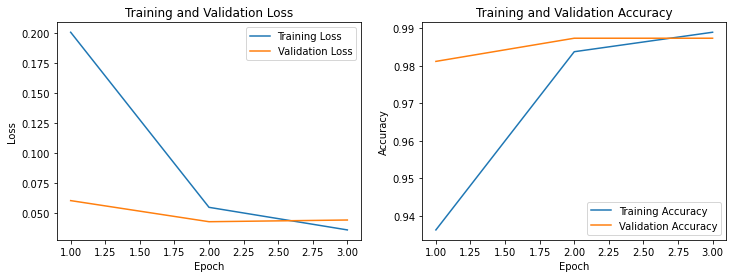

In [16]:
# Your code here
def plot_curves(train_set_losses, train_set_accuracies, val_set_losses,val_set_accuracies):
    #Function to plot training and validation loss and accuracy curves
    
    epoch_num = range(1, len(train_set_losses) + 1)

    plt.figure(figsize=(12, 4))               #Create a figure with two subplots 

    #Plot Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, train_set_losses, label='Training Loss')
    plt.plot(epoch_num, val_set_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    #Plot Training and Validation Accuracy 
    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, train_set_accuracies, label='Training Accuracy')
    plt.plot(epoch_num, val_set_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

#Plotting the curves
plot_curves(train_set_losses, train_set_accuracies, val_set_losses,val_set_accuracies)

In [18]:
# Print out test accuracy
print('Test Set Accuracy:',test_set_accuracy)

Test Set Accuracy: 0.9887
